<h1>Exercise set 3: Equilibrium Points (04/10 - 08/10)</h1>
In this set of exercises we will examine systems and their equilibrium points. Equilibrium points are points in the system where either all paths lead to (stable equilibrium) or all paths leave from.

In [1]:
"""
imports
"""

import numpy as np                      # Math
import matplotlib.pyplot as plt         # Plotting
import matplotlib as mpl                # Matplotlib
from ipywidgets import interact         # Interactivity
from scipy.optimize import fsolve       # Numerically solve equations
import ipywidgets as widgets            # Widgets

<h2>Exercise 3.1: Equilibrium points in 1D</h2>
<h3>Part 1: Growth of tumors</h3>
The growth of tumors can be described by the following equation:
\begin{equation*}
X' = X\left(k - \alpha \ln \left(\frac{X}{X(0)}\right)\right)
\end{equation*}

Where $X$ is the mass of the tumor, $X_0$ is the starting mass of the tumor. $\alpha$ and k are positive constants. We now want to find the equilibrium points for this equation. To find these points we solve the equation where $X' = 0$. We then find two solutions:

\begin{equation*}
\begin{cases}
X' = 0 \\
X' = X_0 \cdot e^{\frac{k}{a}}
\end{cases}
\end{equation*}

To find whether these are stable or unstable equilibrium points, we use linear stability analysis. In linear stability analysis we calculate the tangent line in the equilibrium points, which corresponds to finding the derivative in the equilibrium points. This way we find the direction of the change vectors around the equilibrium points. The derivative of the equation is:

\begin{equation*}
\frac{dX'}{dX} = \left(k - \alpha \ln \left(\frac{X}{X(0)}\right)\right) - \alpha
\end{equation*}

This way we find that $X=0$ is an unstable equilibrium point and $X=X_0 \cdot e^{\frac{k}{a}}$ is a stable equilibrium point.

In [2]:
"""
Brain tumor data and functions
"""

# constants for the equation
k_t = 0.1
alpha_t = 1
X_0 = 5
l = 2.5 # length for half of the tangent line


def tumor_eq(x):
    """
    Tumor equation
    """
    return x*(k_t - alpha_t*np.log(x / X_0))


def d_tumor_eq(x):
    """
    Derivative of tumor equation
    """
    return (k_t - alpha_t*np.log(x / X_0)) + -alpha_t


def eq_points():
    """
    Calculate equilibrium point
    """
    return np.exp(k_t / alpha_t) * X_0


def calc_slope(a, b, x):
    """
    Calculate the tangent line to an equilibrium point
    """
    return a*x + b


# create X and X' values for the plot
s_tumor = 100
X = np.linspace(0.0001, 8, s_tumor)
X_p = tumor_eq(X)

# calculate equilibrium points
eq_point_1, eq_point_2 = 0.0001, eq_points()


# calculate derivative in equilibrium points
dX_p_1 = d_tumor_eq(eq_point_1)
dX_p_2 = d_tumor_eq(eq_point_2)


# calculate how long the tangent lines should be along
# the x axis and create linspaces accordingly
dx1 = np.abs(l*np.cos(np.arctan(dX_p_1)))
dx2 = np.abs(l*np.cos(np.arctan(dX_p_2)))
dX_1 = np.linspace(eq_point_1 - dx1, eq_point_1 + dx1, 10)
dX_2 = np.linspace(eq_point_2 - dx2, eq_point_2 + dx2, 10)


# calculate the tangent lines
slope_1 = calc_slope(dX_p_1, 0, dX_1)
slope_2 = calc_slope(dX_p_2, -dX_p_2*eq_point_2, dX_2)

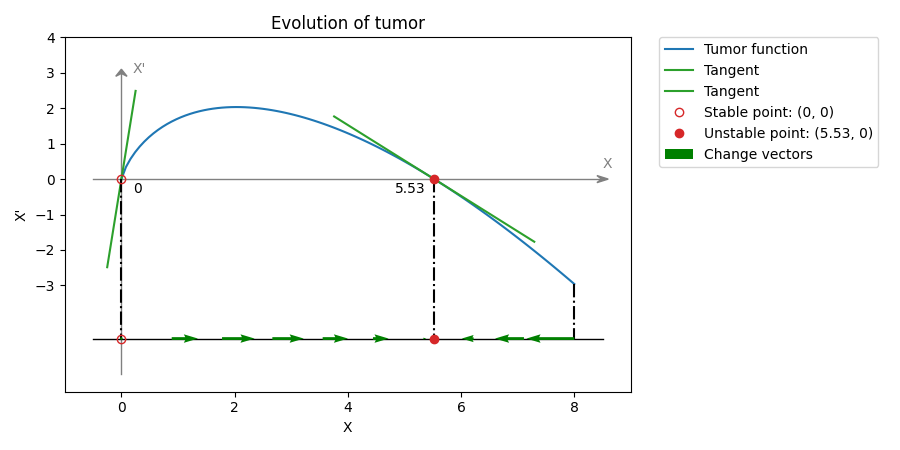

In [3]:
"""
Brain tumor plotting
"""

%matplotlib widget

# init plots
fig_tumor, ax_tumor = plt.subplots(nrows=1, ncols=1, figsize=(9, 4.5))


# set limits on x and y axis. Stop labels on axis after a certain point
ax_tumor.set_ylim(-6, 4)
ax_tumor.set_xlim(-1, 9)
ax_tumor.set_yticks([i for i in range(-3, 5)][::-1])


# plot tumor equation
ax_tumor.plot(X, X_p, label='Tumor function', color='tab:blue')


# plot the slopes in the equilibrium points
ax_tumor.plot(dX_1, slope_1, color='tab:green', label='Tangent')
ax_tumor.plot(dX_2, slope_2, color='tab:green', label='Tangent')


# plot the equilibrium points
eq_point_plot_1, = ax_tumor.plot([eq_point_1, eq_point_1], [0, -4.5],
                                 marker='o', markerfacecolor='none', 
                                 linestyle='none', color='tab:red', 
                                 label = 'Stable point: (0, 0)'.format(np.around(eq_point_1, 2)), 
                                 zorder=10)

eq_point_plot_2, = ax_tumor.plot([eq_point_2, eq_point_2], [0, -4.5],
                                 marker='o', 
                                 linestyle='none', color='tab:red', 
                                 label = 'Unstable point: ({}, 0)'.format(np.around(eq_point_2, 2)), 
                                 zorder = 10)


# annotate the equilibrium points
ax_tumor.text(eq_point_1 + 0.2, -0.4, '0')
ax_tumor.text(eq_point_2 - 0.7, -0.4, '{}'.format(np.around(eq_point_2, 2)))

# Draw the change vectors
s_quiv = 10
X_quiv = np.linspace(0.0001, 8, s_quiv)
Y_quiv = np.full(s_quiv, -4.5)
X_p_quiv = tumor_eq(X_quiv)
Y_p_quiv = np.zeros(s_quiv)
ax_tumor.quiver(X_quiv, Y_quiv, X_p_quiv, Y_p_quiv, width=0.005, scale=35, 
                color="green", label="Change vectors", zorder=20)

# add dotted lines between equilibrium points and vector axis
ax_tumor.plot([eq_point_1, eq_point_1], [0, -4.5], 
              color='black', linewidth=1.5, linestyle='dashdot', zorder=3)
ax_tumor.plot([eq_point_2, eq_point_2], [0, -4.5], 
              color='black', linewidth=1.5, linestyle='dashdot', zorder=3)
ax_tumor.plot([8, 8], [tumor_eq(8), -4.5], 
              color='black', linewidth=1.5, linestyle='dashdot', zorder=3)
ax_tumor.plot([-0.5, 8.5], [-4.5, -4.5], color='black', linewidth=1, zorder=3)

# add X and Y axis (lines, arrows and labels)
ax_tumor.plot([0, 0], [3, -5.5], color='gray', linewidth=1, zorder=1)
ax_tumor.plot([-0.5, 8.5], [0, 0], color='gray', linewidth=1, zorder=1)
ax_tumor.arrow(0, 3, 0, 0.1, color='gray', 
               length_includes_head=True, head_width=0.2, head_length=0.2, overhang=0.4, zorder=5)
ax_tumor.arrow(8.5, 0, 0.1, 0, color='gray', 
               length_includes_head=True, head_width=0.2, head_length=0.2, overhang=0.4, zorder=5)
ax_tumor.text(8.5, 0.3, 'X', c='gray')
ax_tumor.text(0.2, 3, "X'", c='gray')

# add labels and a grid
ax_tumor.set_xlabel('X')
ax_tumor.set_ylabel("X'")
ax_tumor.set_title('Evolution of tumor')
ax_tumor.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
fig_tumor.tight_layout()

<h3>Part 2: Stability of other systems</h3>
In part 2 we will examine the stability of 3 other systems. Those are:

\begin{align*}
    X' &= -X^3 \\
    X' &= X^3 \\
    X' &= X^2 \\
\end{align*}

All of these systems have equilibria at $X=0$. We will use their derivatives to determine their stability.

\begin{align*}
    \frac{dX'}{dX} &= -3X^2 \\
    \frac{dX'}{dX} &= 3X^2 \\
    \frac{dX'}{dX} &= 2X \\
\end{align*}

From these systems we find that $X' = -X^3$ has a stable equilibrium point and both $X' = X^3$ and $X' = X^2$ have unstable equilibria.

In [4]:
def func_1(X):
    return -X**3


def func_2(X):
    return X**3


def func_3(X):
    return X**2


x_val = np.linspace(-2, 2, 100)
f1 = func_1(x_val)
f2 = func_2(x_val)
f3 = func_3(x_val)

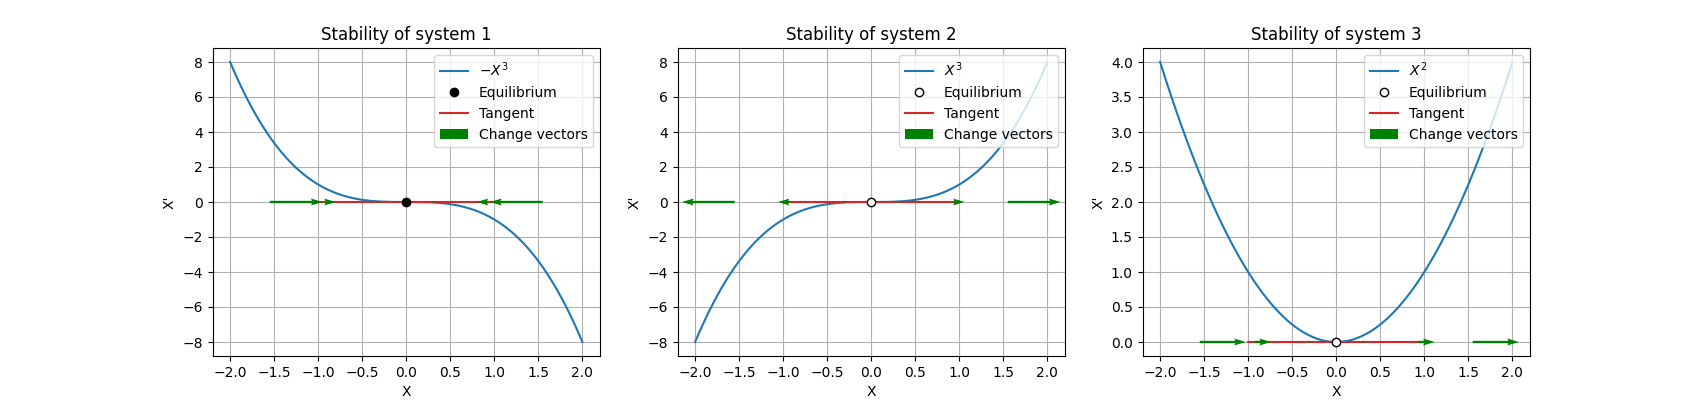

In [5]:
%matplotlib widget
# init the plots
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 4))
labels = ['$-X^3$','$X^3$', '$X^2$']

# plot main function
axes[0].plot(x_val, f1, label=labels[0], color='tab:blue')
axes[1].plot(x_val, f2, label=labels[1], color='tab:blue')
axes[2].plot(x_val, f3, label=labels[2], color='tab:blue')

# plot equilibrium points
axes[0].plot(0, 0, label = 'Equilibrium',zorder=10,
             marker='o', linestyle='none', color='Black')
axes[1].plot(0, 0, label = 'Equilibrium',zorder=10,
             marker='o', markerfacecolor='white', linestyle='none', color='Black')
axes[2].plot(0, 0, label = 'Equilibrium',zorder=10,
             marker='o', markerfacecolor='white', linestyle='none', color='Black')

# plot change vectors
n_vec = 6
x_range = np.linspace(-1.55, 1.55, n_vec)
axes[0].quiver(x_range, np.zeros(n_vec), func_1(x_range), np.zeros(n_vec), width=0.006, 
                color="green", label="Change vectors", zorder=20)
axes[1].quiver(x_range, np.zeros(n_vec), func_2(x_range), np.zeros(n_vec), width=0.006, 
                color="green", label="Change vectors", zorder=20)
axes[2].quiver(x_range, np.zeros(n_vec), func_3(x_range), np.zeros(n_vec), width=0.006, 
                color="green", label="Change vectors", zorder=20)

# for loop to format all the plots at once
for i in range(0, 3):
    # tangent lines
    axes[i].plot([-1, 1], [0, 0], color='tab:red', label='Tangent')
    
    # title and labels
    axes[i].set_title("Stability of system {}".format(i+1))
    axes[i].set_xlabel('X')
    axes[i].set_ylabel("X'")
    
    # grid and legend
    axes[i].grid()
    axes[i].legend(loc="upper right") 

<h2>Exercise 3.2: Equilibria points in 2D</h2>

In [6]:
def euler_int_2(x_start, y_start, step, t, func_x, func_y, x_min=-50, x_max=50, y_min=-50, y_max=50):
    """
    function implementing the euler method
    for integrating a function with 2 variables.
    We have a min and max limit on each axis so we
    don't calculate paths that are not visible
    """
    x = np.zeros(5000)
    y = np.zeros(5000)
    x[0] = x_start
    y[0] = y_start
    i = 0
    while (x_min <= x[i] <= x_max) and (y_min <= y[i-1] <= y_max) and (i < 5000-1):
        x[i+1] = x[i] + step * func_x(x[i], y[i])
        y[i+1] = y[i] + step * func_y(x[i], y[i])
        i+=1
    return np.trim_zeros(x, 'b'), np.trim_zeros(y, 'b')


def get_color_range(N, c_map_name):
    """
    Function that, given a color map and a number N, will pull N
    equally spaced values from that colormap to use for the different
    lines wa are going to plot
    """
    cmap = mpl.cm.get_cmap(c_map_name)
    return [cmap(i) for i in np.linspace(0, 1, N)]


# calculate and draw paths
def plot_lines(ax, start_locs, steps, size, func_x, func_y, 
               arrow_step=35, lim=5, add_label=True, add_start_label=False, 
               color='red', cmap_name=None, line_style='solid'):
    """
    A function that plots the paths the vectorspace and adds arrows
    onto them. We have a list with locations where we want to start
    calculating the path from. We then use euler integration to find
    the x and y values we need to plot. Next we set a range and skip
    a lot of values each iteration. An arrow per point would b-e too
    much. Finally we normalize the vectors and plot them.
    """
    # if there is a cmap given we want to use it
    if cmap_name:
        cmap = get_color_range(len(start_locs), cmap_name)
    
    # enumerate over all starting locations
    for n, (i, j) in enumerate(start_locs):
        # if we use a colormap, we get the appropriate color from the map
        if cmap_name:
            color = cmap[n]
            
        # plot the paths
        X_2euler, Y_2euler = euler_int_2(i, j, steps, size, func_x, func_y)
        ax.plot(X_2euler, Y_2euler, color=color, linestyle=line_style,
                label=f'($X_0$, $Y_0$)=({np.around(i, 2)}, {np.around(j, 2)})' if add_start_label else None)
        
        # arrays to plot the arrows
        x_pos, y_pos, x_dir, y_dir = np.zeros(len(X_2euler)-2), np.zeros(len(X_2euler)-2), np.zeros(len(X_2euler)-2), np.zeros(len(X_2euler)-2)
        
        # calculate the arrow position and directions
        for i in range(10, len(X_2euler)-2, arrow_step):
            x_pos[i] = X_2euler[i]
            y_pos[i] = Y_2euler[i]
            x_dir[i] = X_2euler[i+2] - X_2euler[i]
            y_dir[i] = Y_2euler[i+2] - Y_2euler[i]
            
            # we don't want to do unnecessary work. When the paths are out
            # of view we stop calculating
            if -lim < X_2euler[i] < lim and -lim < Y_2euler[i] < lim:
                break
        
        # trim all trailing zeros
        np.trim_zeros(x_pos, 'b')
        np.trim_zeros(y_pos, 'b')
        np.trim_zeros(x_dir, 'b')
        np.trim_zeros(y_dir, 'b')
                
        # we normalize the vectors so they all have the same length
        N = np.hypot(x_dir, y_dir)
        N[N == 0] = 1
        x_dir_norm = x_dir / N
        y_dir_norm = y_dir / N
        
        # using quiver we can easily plot all arrows at once. This is
        # faster than seperate arrow calls.
        ax.quiver(x_pos, y_pos, x_dir_norm, y_dir_norm, color=color, 
                      width=0.01, scale=60, headwidth=5, headlength=5, zorder=0,
                     label='Paths and vectors of the system' if add_label else None)
        
        # we use this to only add one label, instead of a label per line
        add_label = False

In the plot_lines and euler_int function, when calculating the arrow positions and directions, I chose to create an array of zeros, add each element in the correct place. This operation is stopped once the points are outside of the viewable area. Then we remove any trailing zeros. This was chosen over using append because this is a very slow operation. When appending to a numpy array, the whole array is copied into a new array that is 1 bigger and the new element is added at the end. This means there is a lot of overhead that makes this operation slow. With trimming, the array is only copied once, and we simply change the zeros into the elements we want.

<h3>Exercise 3.2.1: Eigenvalues and eigenvectors</h3>
<h4>Part 1: </h4>
We want to solve the following system for their eigenvalues and eigenvectors to find the stable and unstable directions.
$$X' = \frac{9}{7} X - \frac{4}{7} Y$$
$$Y' = \frac{8}{7} X - \frac{9}{7} Y$$

We can describe the system with matrix $A$:

$$A = 
\begin{bmatrix}
\frac{9}{7} & -\frac{4}{7}\\
\frac{8}{7} & -\frac{9}{7}
\end{bmatrix}$$

To find the eigenvalues $\lambda$ and eigenvectors $V$ of the system, we have to solve $A \cdot V = \lambda A$, which we can write as:

$$(A - \lambda I) \cdot V = 0$$

Where $I$ is the identity matrix. This has non trivial solutions when $A - \lambda I$ equals zero. From this we can calculate the eigen values.
 
$$\rm{det}(A - \lambda I) = 
\begin{vmatrix}
\frac{9}{7} - \lambda & -\frac{4}{7}\\
\frac{8}{7} & -\frac{9}{7} - \lambda
\end{vmatrix}
= 0$$

$$\Leftrightarrow \lambda^2 - 1 = 0$$

This means we have 2 eigenvalues: $\lambda = \pm 1$.

We can find the corresponding eigenvectors by solving the system for both eigenvalues. We find the following eigenvector for $\lambda = 1$:

$$\begin{cases}
2X - 4Y = 0 \\
8X - 16Y = 0
\end{cases}$$

We then find the following eigenvector for $\lambda = 1$ is equal to $(0.89, 0.45)$.
$$
V_1 = 
\begin{bmatrix}
2 \\
1
\end{bmatrix}
$$

and for $\lambda = -1$ we find

$$\begin{cases}
16X - 4Y = 0 \\
8X - 2Y = 0
\end{cases}$$

We then find the following eigenvector for $\lambda = -1$ is equal to $(0.24, 0.97)$.
We will also calculate these numerically.

In [7]:
"""
Determine eigenvalues and eigenvectors
"""
eigen_vals, eigen_vecs = np.linalg.eig(np.array([[9/7, -4/7], [8/7, -9/7]]))
print('The eigenvectors are: λ={} en λ={}'.format(np.around(eigen_vals[0], 0), np.around(eigen_vals[1], 0)))
print('The eigenvectors are:')
e_vec1 = eigen_vecs[:,0]
e_vec2 = eigen_vecs[:,1]
print(e_vec1)
print(e_vec2)

The eigenvectors are: λ=1.0 en λ=-1.0
The eigenvectors are:
[0.89442719 0.4472136 ]
[0.24253563 0.9701425 ]


In [8]:
def x_prime(x, y):
    return (9/7)*x - (4/7)*y

def y_prime(x, y):
    return (8/7)*x - (9/7)*y

size_1 = 1000
steps_1 = 0.005

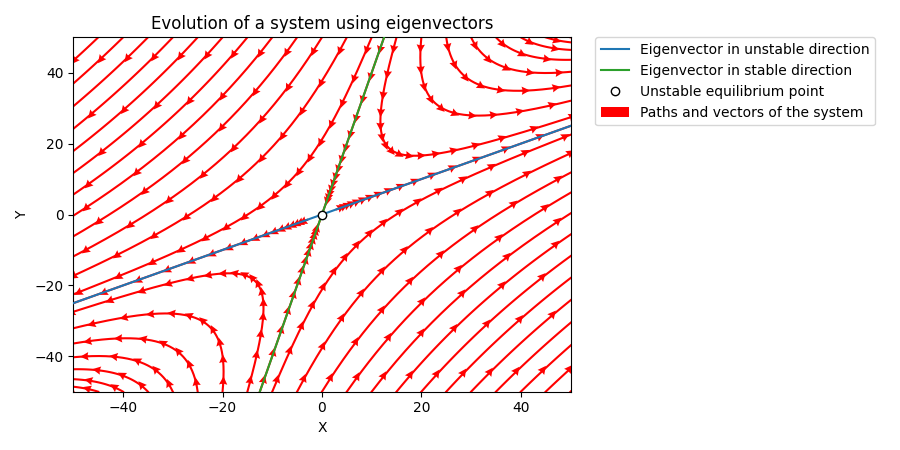

In [9]:
"""
Plotting
"""
%matplotlib widget

# init plot
f_2, axes_2 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4.5))
axes_2.set_ylim(-50, 50)
axes_2.set_xlim(-50, 50)

# Draw eigen vectors. We first calculate the slope of the
# line, than we use this in the equation y=a*x to find the
# y positions corresponding to the x limits for the first eigen
# vector. For the second eigen vector we want to find the x values
# corresponding to the y limits.
slope_evec_1 = e_vec1[1] / e_vec1[0]
slope_evec_2 = e_vec2[0] / e_vec2[1]
axes_2.plot([-50, 50], [-slope_evec_1*50, slope_evec_1*50], zorder=10,
            color='tab:blue', label='Eigenvector in unstable direction')
axes_2.plot([-slope_evec_2*50, slope_evec_2*50], [-50, 50], zorder=10,
            color='tab:green', label='Eigenvector in stable direction')

# plot the lines around the eigenvectors (1)
# plot the lines on the first eigenvector (2)
# plot the lines on the second eigenvector (3)
plot_lines(axes_2, [(i, j) for i in range(-50, 51, 5) for j in [-50, 50]], steps_1, size_1, x_prime, y_prime)
plot_lines(axes_2, [(slope_evec_2*50, 50), (-slope_evec_2*50, -50)], steps_1, size_1, x_prime, y_prime, add_label=False)
plot_lines(axes_2, [(3, slope_evec_1*3), (-3, -slope_evec_1*3)], steps_1, size_1, x_prime, y_prime, lim=3, add_label=False)

# draw point to denote an unstable equilibrium
axes_2.plot(0, 0, label = 'Unstable equilibrium point', zorder=10,
             marker='o', markerfacecolor='white', linestyle='none', color='Black')

# add labels
axes_2.set_xlabel('X')
axes_2.set_ylabel('Y')
axes_2.set_title('Evolution of a system using eigenvectors')
axes_2.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
f_2.tight_layout()

<h4>Part 2: The Rayleigh oscillator</h4>
We want to solve the following system for their eigenvalues and eigenvectors to find the stable and unstable directions.

\begin{align*}
X' &= V \\
V' &= -X - \left(V^3 - V\right)
\end{align*}

We can describe the system with matrix $A$:

$$B = 
\begin{bmatrix}
0 & 1\\
-1 & 1
\end{bmatrix}$$

To find the eigenvalues $\lambda$ and eigenvectors $V$ of the system, we have to solve $A \cdot V = \lambda A$, which we can write as:

$$(B - \lambda I) \cdot V = 0$$

Where $I$ is the identity matrix. This has non trivial solutions when $A - \lambda I$ equals zero. From this we can calculate the eigen values.
 
$$\rm{det}(B - \lambda I) = 
\begin{vmatrix}
- \lambda & 1\\
-1 & 1 - \lambda
\end{vmatrix}
= 0$$

$$\Leftrightarrow \lambda^2 - \lambda + 1 = 0$$

This means we have 2 eigenvalues: $\lambda = \frac{1 \pm \sqrt{3}i}{2}$.

We can find the corresponding eigenvectors by solving the system for both eigenvalues. We find the following eigenvector for $\lambda = \frac{1 + \sqrt{3}i}{2}$:

$$\begin{cases}
-\frac{1 + \sqrt{3}i}{2} X + Y = 0 \\
- X + \left(1 - \frac{1 + \sqrt{3}i}{2}\right) Y = 0
\end{cases}$$

We then find the following eigenvector for $\lambda = \frac{1 + \sqrt{3}i}{2}$ is $\left(1, \frac{1 + \sqrt{3}i}{2}\right)$.

and for $\lambda = \frac{1 - \sqrt{3}i}{2}$ we find

$$\begin{cases}
-\frac{1 - \sqrt{3}i}{2} X + Y = 0 \\
- X + \left(1 - \frac{1 - \sqrt{3}i}{2}\right) Y = 0
\end{cases}$$

We then find the following eigenvector for $\lambda = \frac{1 - \sqrt{3}i}{2}$ is $\left(1, \frac{1 - \sqrt{3}i}{2}\right)$.
We will also calculate these numerically.

In [10]:
"""
Determine eigenvalues and eigenvectors
"""
e_vals_ro, e_vecs_ro = np.linalg.eig(np.array([[0, 1], [-1, 1]]))
print('The eigenvectors are: λ={} en λ={}'.format(np.around(e_vals_ro[0], 2), np.around(e_vals_ro[1], 2)))
print('The eigenvectors are:')
e_vec1 = np.around(e_vecs_ro[:,0], 3)
e_vec2 = np.around(e_vecs_ro[:,1], 3)
print(e_vec1)
print(e_vec2)

The eigenvectors are: λ=(0.5+0.87j) en λ=(0.5-0.87j)
The eigenvectors are:
[0.707+0.j    0.354+0.612j]
[0.707-0.j    0.354-0.612j]


In [11]:
def X_prime(X, V):
    return V


def V_prime(X, V):
    return -X - (V**3 - V)


In [12]:
"""
Data
"""

steps_2 = 0.01
size_2 = 1000

# number of starting points
n_points = 6

# we have starting points on 2 circles, an inside circle with small
# radius and an outside one with big radius
start_coords = [(r * np.cos(2*np.pi / n_points * i), 
                 r * np.sin(2*np.pi / n_points * i)) 
                 for r in [0.05, 2] for i in range(n_points)]


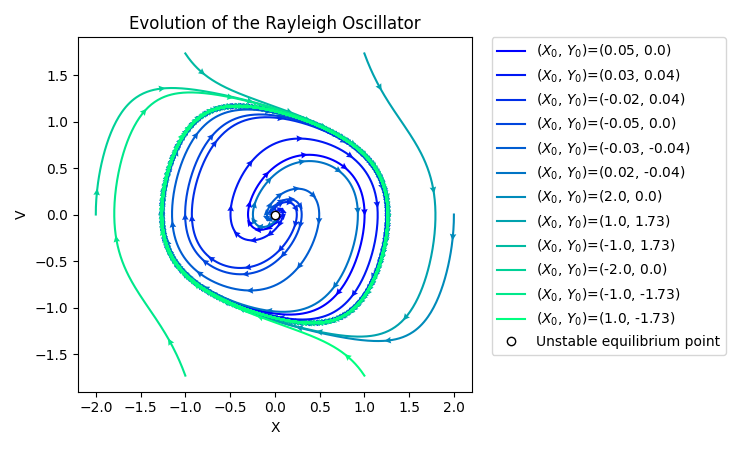

In [18]:
"""
plotting
"""

# init plots
f_3, axes_3 = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 4.5))


plot_lines(axes_3, start_coords, steps_2, size_2, X_prime, V_prime, 
           cmap_name='winter', arrow_step=75, lim=0.0, add_label=False, add_start_label=True)

# draw point to denote an unstable equilibrium
axes_3.plot(0, 0, label = 'Unstable equilibrium point', zorder=10,
             marker='o', markerfacecolor='white', linestyle='none', color='Black')

axes_3.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# add labels
axes_3.set_xlabel('X')
axes_3.set_ylabel('V')
axes_3.set_title('Evolution of the Rayleigh Oscillator')
f_3.tight_layout()

We used a colormap so it is easier to distinguish the different curves from each other since there is so much overlap.

<h3>Exercise 3.2.1: Nullclines: Collins Genetic Toggle Switch</h3>

In [16]:
"""
Collins Genetic Toggle Switch: functions and constants
"""
k = 5


def R_prime(r, c):
    return k / (1 + c**4) - r


def R_prime_0(c):
    return k / (1 + c**4)
    
    
def C_prime(r, c):
    return k / (1 + r**4) - c


def C_prime_0(r):
    return k / (1 + r**4)
    

def system(guess):
    r, c = guess
    return (R_prime(r, c), C_prime(r, c))

In [17]:
"""
Equilibrium points
"""

# Find the equilibrium points numerically
eq_1 =  fsolve(system, (0, 5))
eq_2 =  fsolve(system, (5, 0))
eq_3 =  fsolve(system, (1.5, 1.5))

print('The equilibrium points are given by: P_1 = ({:.3f}, {:.3f}), P_2 = ({:.3f}, {:.3f}) and \
P_3 = ({:.3f}, {:.3f}))'.format(eq_1[0], eq_1[1], eq_2[0], eq_2[1], eq_3[0], eq_3[1]))

The equilibrium points are given by: P_1 = (0.008, 5.000), P_2 = (5.000, 0.008) and P_3 = (1.299, 1.299))


In [18]:
def plot_nullcline_arrows(coord_l, func_1, func_2):
    label = True
    for x, y in coord_l:
        # calculate the change for R and C
        delta_R = func_1(x, y)
        delta_C = func_2(x, y)
        
        # normalize the arrow lengths
        N = np.hypot(delta_R, delta_C)
        delta_R = delta_R / N
        delta_C = delta_C / N
        
        plt.arrow(x, y, delta_R, 0, color='red', head_width=0.1, width=0.02, length_includes_head=True,
                 label='Arrow in R direction' if label else None)
        
        plt.arrow(x, y, 0, delta_C, color='blue', head_width=0.1, width=0.02, length_includes_head=True,
                 label='Arrow in C direction' if label else None)
        
        plt.arrow(x, y, delta_R, delta_C, color='black', head_width=0.1, width=0.02, length_includes_head=True,
                 label='Arrow in R and C direction' if label else None)
        
        label = False

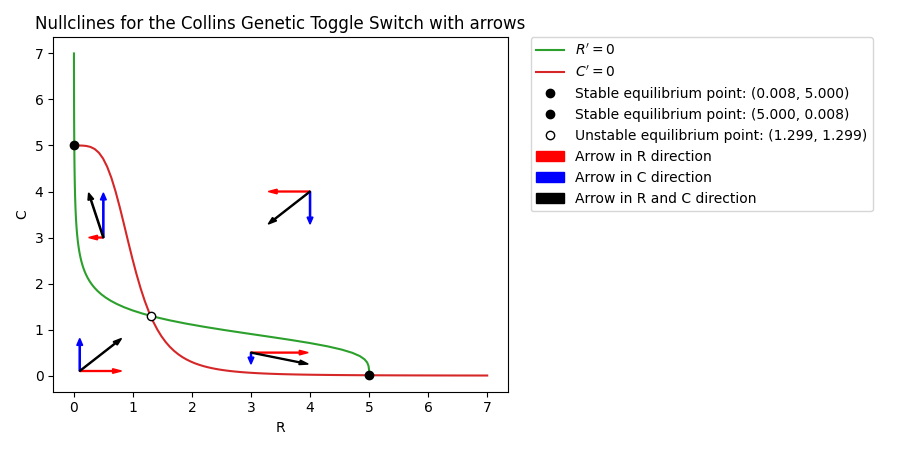

In [19]:
"""
Plotting with arrows
"""

# init plots
f_4, axes_4 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4.5))

# Plot the paths:
# Case 1: R' = 0:
C_R0 = np.linspace(0, 7, 100)
R_R0 = R_prime_0(C_R0)
axes_4.plot(R_R0, C_R0, label="$R' = 0$", color='tab:green')
            
# Case 2: C' = 0:
R_C0 = np.linspace(0, 7, 100)
C_C0 = R_prime_0(R_C0)
axes_4.plot(R_C0, C_C0, label="$C' = 0$", color='tab:red')

# plot equilibrium point
axes_4.plot(0.008, 5.000, label = 'Stable equilibrium point: ({:.3f}, {:.3f})'.format(eq_1[0], eq_1[1]), zorder=10,
             marker='o', markerfacecolor='black', linestyle='none', color='Black')

axes_4.plot(5.000, 0.008, label = 'Stable equilibrium point: ({:.3f}, {:.3f})'.format(eq_2[0], eq_2[1]), zorder=10,
             marker='o', markerfacecolor='black', linestyle='none', color='Black')

axes_4.plot(1.299, 1.299, label = 'Unstable equilibrium point: ({:.3f}, {:.3f})'.format(eq_3[0], eq_3[1]), zorder=10,
             marker='o', markerfacecolor='white', linestyle='none', color='Black')

# arrow positions
arrow_pos = [(0.1, 0.1), (4, 4), (0.5, 3), (3, 0.5)]

# plot arrows
plot_nullcline_arrows(arrow_pos, R_prime, C_prime)

# labels
axes_4.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
axes_4.set_xlabel('R')
axes_4.set_ylabel('C')
axes_4.set_title("Nullclines for the Collins Genetic Toggle Switch with arrows")
f_4.tight_layout()

In [20]:
steps_3 = 0.01
size_3 = 1000

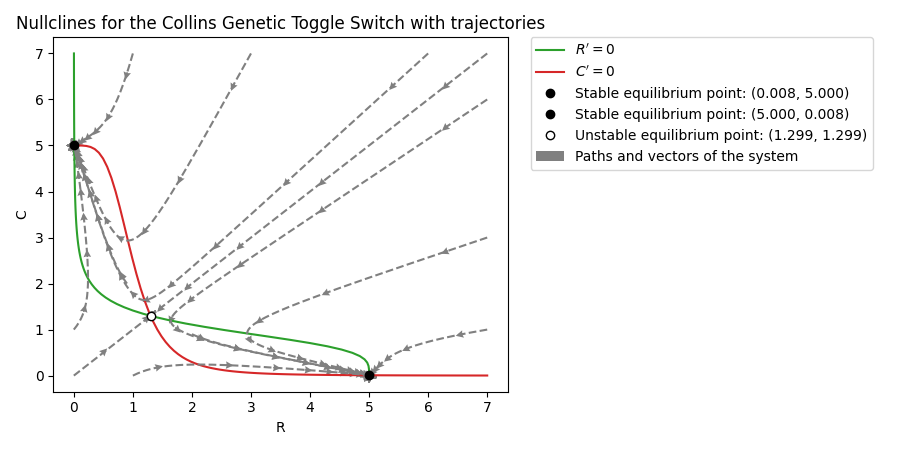

In [21]:
"""
Plotting with trajectories
"""

# init plots
f_5, axes_5 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4.5))

# Plot the paths:
axes_5.plot(R_R0, C_R0, label="$R' = 0$", color='tab:green')
axes_5.plot(R_C0, C_C0, label="$C' = 0$", color='tab:red')

# plot equilibrium point
axes_5.plot(0.008, 5.000, label = 'Stable equilibrium point: ({:.3f}, {:.3f})'.format(eq_1[0], eq_1[1]), zorder=10,
             marker='o', markerfacecolor='black', linestyle='none', color='Black')
axes_5.plot(5.000, 0.008, label = 'Stable equilibrium point: ({:.3f}, {:.3f})'.format(eq_2[0], eq_2[1]), zorder=10,
             marker='o', markerfacecolor='black', linestyle='none', color='Black')
axes_5.plot(1.299, 1.299, label = 'Unstable equilibrium point: ({:.3f}, {:.3f})'.format(eq_3[0], eq_3[1]), zorder=10,
             marker='o', markerfacecolor='white', linestyle='none', color='Black')

# starting points for the trajectories
p_start = [(0, 0), (0, 1), (1, 0), (3, 7), (7, 3), (7, 7), (2, 0.9), (0.9, 2), (1, 7), (7, 1), (7, 6), (6, 7)]

# plot the trajectories
plot_lines(axes_5, p_start, steps_3, size_3, R_prime, C_prime, color='gray', lim=0, arrow_step=40, line_style='dashed')

# labels
axes_5.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
axes_5.set_xlabel('R')
axes_5.set_ylabel('C')
axes_5.set_title("Nullclines for the Collins Genetic Toggle Switch with trajectories")
f_5.tight_layout()